INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:sub acknowledge message id=1
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0


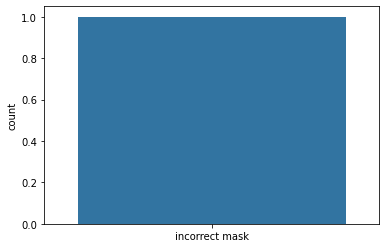

INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0


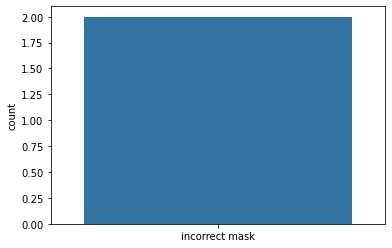

INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0


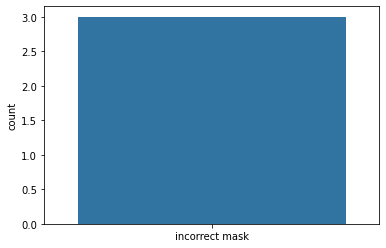

INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0


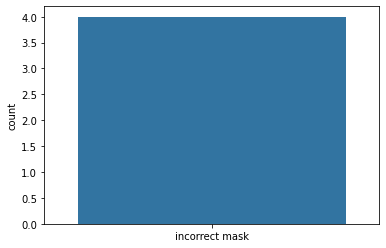

INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0


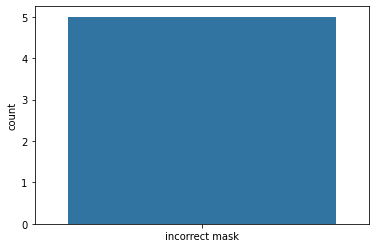

INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0


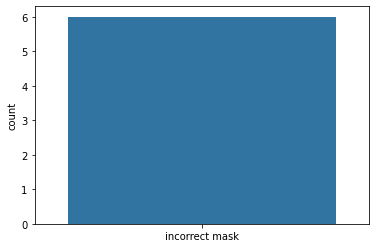

INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0


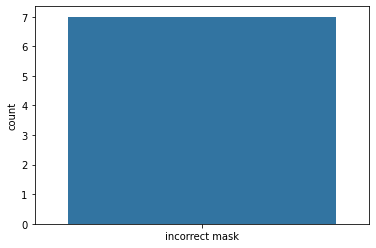

INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0


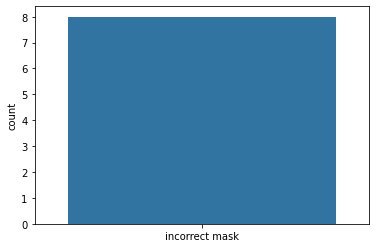

INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0


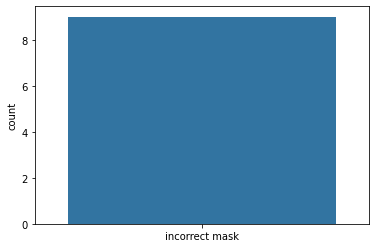

INFO:root:DisConnected result code 1
INFO:root:Connected flags{'session present': 1}result code 0
INFO:root:DisConnected result code 1


KeyboardInterrupt: 

In [3]:
import paho.mqtt.client as mqtt
import matplotlib.pyplot as plt
import seaborn as sns
import time,logging
broker="test.mosquitto.org"
home_topic="PC_TAIEB"
port=1883
QOS=0

CLEAN_SESSION=True
logging.basicConfig(level=logging.INFO) #error logging
#use DEBUG,INFO,WARNING
def on_subscribe(client, userdata, mid, granted_qos):   #create function for callback
   #print("subscribed with qos",granted_qos, "\n")
   time.sleep(1)
   logging.info("sub acknowledge message id="+str(mid))
   pass

def on_disconnect(client, userdata,rc=0):
    logging.info("DisConnected result code "+str(rc))


def on_connect(client, userdata, flags, rc):
    logging.info("Connected flags"+str(flags)+"result code "+str(rc))

x=[]
def on_message(client, userdata, message):
    msg=str(message.payload.decode("utf-8"))
    x.append(msg.split(":")[0])
    sns.countplot(x)
    plt.show()
       
def on_publish(client, userdata, mid):
    logging.info("message published "  +str(mid))

send_topic ="house/client_a/" +home_topic
client= mqtt.Client("ClientB",False)       #create client object

client.on_subscribe = on_subscribe   #assign function to callback
client.on_disconnect = on_disconnect #assign function to callback
client.on_connect = on_connect #assign function to callback
client.on_message=on_message
client.connect(broker,port)           #establish connection
time.sleep(1)
client.loop_start()
client.subscribe("house/#")

while True:
    #runs forever break with CTRL+C
    #print("publishing on topic ",send_topic)
    msg="message "  + " from client B"
    #client.publish(send_topic,msg)time.sleep(5)
client.disconnect()

client.loop_stop()